In [1]:
from IPython.display import HTML

# Cell visibility - COMPLETE:
#tag = HTML('''<style>
#div.input {
#    display:none;
#}
#</style>''')
#display(tag)

#Cell visibility - TOGGLE:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<p style="text-align:right">
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.</p>''')
display(tag)

## Komplex számok descartesi alakja

Az interaktív példa segítségével tetszőleges komplex számok jeleníthetőek meg a komplex síkon descartes-i formában. Továbbá tesztelhetőek különféle matematikai műveletek: összeadás, kivonás, szorzás és osztás.
Az eredményeket az ábrán láthatja a megfelelő matematikai levezetéssel egyetemben.

A komplex számok módosíthatóak közvetlenül a görbére kattintva, vagy a bemeneti mezőket alkalmazva. A megfelelő megjelenítés céljából a komplex együtthatók korlátozva vannak $\pm10$ közé.

<IPython.core.display.Javascript object>


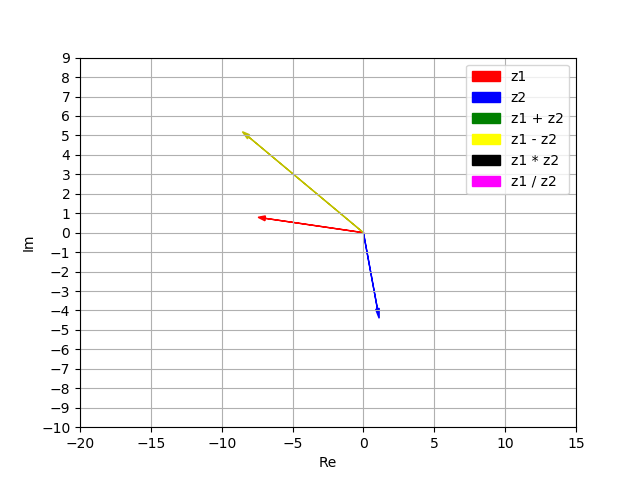

Box(children=(Label(value='z1 = '), BoundedFloatText(value=0.0, layout=Layout(width='10%'), max=10.0, min=-10.…

Box(children=(Label(value='z2 = '), BoundedFloatText(value=0.0, layout=Layout(width='10%'), max=10.0, min=-10.…

Komplex műveletek:


Box(children=(Button(description='Összeadás', style=ButtonStyle()), Button(description='Kivonás', style=Button…

Output()

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import ipywidgets as widgets
from IPython.display import display

red_patch = mpatches.Patch(color='red', label='z1')
blue_patch = mpatches.Patch(color='blue', label='z2')
green_patch = mpatches.Patch(color='green', label='z1 + z2')
yellow_patch = mpatches.Patch(color='yellow', label='z1 - z2')
black_patch = mpatches.Patch(color='black', label='z1 * z2')
magenta_patch = mpatches.Patch(color='magenta', label='z1 / z2')

# Init values

XLIM = 5
YLIM = 5
vectors_index_first = False;
V = [None, None]
V_complex = [None, None]

# Complex plane

fig = plt.figure(num='Komplex számok descartes-i alakban')
ax = fig.add_subplot(1, 1, 1)

def get_interval(lim):
    if lim <= 10:
        return 1
    if lim < 75:
        return 5
    if lim > 100:
        return 25
    return 10
    
def set_ticks():
   
    XLIMc = int((XLIM / 10) + 1) * 10
    YLIMc = int((YLIM / 10) + 1) * 10
        
    if XLIMc > 150:
        XLIMc += 10
    if YLIMc > 150:
        YLIMc += 10
    
    xstep = get_interval(XLIMc)
    ystep = get_interval(YLIMc)
    
    
    #print(stepx, stepy)
    major_ticks = np.arange(-XLIMc, XLIMc, xstep)
    major_ticks_y = np.arange(-YLIMc, YLIMc, ystep)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks_y)
    ax.grid(which='both')

def clear_plot():
    plt.cla()
    set_ticks()
    ax.set_xlabel('Re')
    ax.set_ylabel('Im')
    plt.ylim([-YLIM, YLIM])
    plt.xlim([-XLIM, XLIM])
    plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch, magenta_patch])

clear_plot()
set_ticks()
plt.show()
set_ticks()

# Set a complex number using direct manipulation on the plot 
def set_vector(i, data_x, data_y):
    clear_plot()
    V.pop(i)
    V.insert(i, (0, 0, round(data_x, 2), round(data_y, 2)))
    V_complex.pop(i)
    V_complex.insert(i, complex(round(data_x, 2), round(data_y, 2)))
    if i == 0:
        ax.arrow(*V[0], head_width=0.25, head_length=0.5, color="r", length_includes_head=True)
        a1.value = round(data_x, 2)
        b1.value =  round(data_y, 2)
        if V[1] != None:
            ax.arrow(*V[1], head_width=0.25, head_length=0.5, color="b", length_includes_head=True)
    elif i == 1:
        ax.arrow(*V[1], head_width=0.25, head_length=0.5, color="b", length_includes_head=True) 
        a2.value = round(data_x, 2)
        b2.value =  round(data_y, 2)
        if V[0] != None:
            ax.arrow(*V[0], head_width=0.25, head_length=0.5, color="r", length_includes_head=True)
    max_bound()
        
    
def onclick(event):
    global vectors_index_first
    vectors_index_first = not vectors_index_first
    x = event.xdata
    y = event.ydata
    if (x > 10):
        x = 10.0
    if (x < - 10):
        x = -10.0
    
    if (y > 10):
        y = 10.0
        
    if (y < - 10):
        y = -10.0
        
    if vectors_index_first:      
        set_vector(0, x, y)
    else:
        set_vector(1, x, y)
        
fig.canvas.mpl_connect('button_press_event', onclick)

    
# Widgets
a1 = widgets.BoundedFloatText(layout=widgets.Layout(width='10%'), min = -10, max = 10, step = 0.5)
b1 = widgets.BoundedFloatText(layout=widgets.Layout(width='10%'), min = -10, max = 10, step = 0.5)
button_set_z1 = widgets.Button(description="z1 rajzolása")

a2 = widgets.BoundedFloatText(layout=widgets.Layout(width='10%'), min = -10, max = 10, step = 0.5)
b2 = widgets.BoundedFloatText(layout=widgets.Layout(width='10%'), min = -10, max = 10, step = 0.5)
button_set_z2 = widgets.Button(description="z2 rajzolása")

box_layout_z1 = widgets.Layout(border='solid red', padding='10px')
box_layout_z2 = widgets.Layout(border='solid blue', padding='10px')
box_layout_opers = widgets.Layout(border='solid black', padding='10px')

items_z1 = [widgets.Label("z1 = "), a1, widgets.Label("+ j * "), b1, button_set_z1]
items_z2 = [widgets.Label("z2 = "), a2, widgets.Label("+ j * "), b2, button_set_z2]
display(widgets.Box(children=items_z1, layout=box_layout_z1))
display(widgets.Box(children=items_z2, layout=box_layout_z2))

button_add = widgets.Button(description="Összeadás")
button_substract = widgets.Button(description="Kivonás")
button_multiply = widgets.Button(description="Szorzás")
button_divide = widgets.Button(description="Osztás")
button_reset = widgets.Button(description="Törlés")
output = widgets.Output()

print('Komplex műveletek:')
items_operations = [button_add, button_substract, button_multiply, button_divide, button_reset]
display(widgets.Box(children=items_operations))
display(output)

# Set complex number using input widgets (Text and Button)
def on_button_set_z1_clicked(b):
    z1_old = V[0];
    z1_new = (0, 0, a1.value, b1.value)
    if z1_old != z1_new:
        set_vector(0, a1.value, b1.value)
    change_lims()
    
def on_button_set_z2_clicked(b):
    z2_old = V[1];
    z2_new = (0, 0, a2.value, b2.value)
    if z2_old != z2_new:
        set_vector(1, a2.value, b2.value)
    change_lims()   

# Complex number operations:
def perform_operation(oper):
    global XLIM, YLIM
    if (V_complex[0] != None) and (V_complex[1] != None):
        if (oper == '+'):
            result = V_complex[0] + V_complex[1]
            v_color = "g"
        elif (oper == '-'):
            result = V_complex[0] - V_complex[1]
            v_color = "y"
        elif (oper == '*'):
            result = V_complex[0] * V_complex[1]
            v_color = "black"
        elif (oper == '/'):
            result = V_complex[0] / V_complex[1]
            v_color = "magenta"
        result = complex(round(result.real, 2), round(result.imag, 2))
        ax.arrow(0, 0, result.real, result.imag, head_width=0.25, head_length=0.5, color=v_color, length_includes_head=True)
        
        if abs(result.real) > XLIM:
            XLIM = round(abs(result.real) + 1)
        if abs(result.imag) > YLIM:
            YLIM = round(abs(result.imag) + 1)
        change_lims()
        
        with output:
            print(V_complex[0], oper, V_complex[1], "=", result)
        
    
def on_button_add_clicked(b):
    perform_operation("+")
                  
def on_button_substract_clicked(b):
    perform_operation("-")

def on_button_multiply_clicked(b):
    perform_operation("*")

def on_button_divide_clicked(b):
    perform_operation("/")
          
        
# Plot init methods        
def on_button_reset_clicked(b):
    global V, V_complex, XLIM, YLIM
    with output:
        output.clear_output()
        clear_plot()
        vectors_index_first = False;
        V = [None, None]
        V_complex = [None, None]
        a1.value = 0
        b1.value = 0
        a2.value = 0
        b2.value = 0
        XLIM = 5
        YLIM = 5
        change_lims()
        
def clear_plot():
    plt.cla()
    set_ticks()
    ax.set_xlabel('Re')
    ax.set_ylabel('Im')
    plt.ylim([-YLIM, YLIM])
    plt.xlim([-XLIM, XLIM])
    plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch, magenta_patch])

def change_lims():
    set_ticks()
    plt.ylim([-YLIM, YLIM])
    plt.xlim([-XLIM, XLIM])
    set_ticks()
    
def max_bound():
    global XLIM, YLIM
    mx = 0
    my = 0
    if V_complex[0] != None:
        z = V_complex[0]
        if abs(z.real) > mx:
            mx = abs(z.real)
        if abs(z.imag) > my:
            my = abs(z.imag)
    if V_complex[1] != None:
        z = V_complex[1]
        if abs(z.real) > mx:
            mx = abs(z.real)
        if abs(z.imag) > my:
            my = abs(z.imag)
    if mx > XLIM:
        XLIM = round(mx + 1)
    elif mx <=5:
        XLIM = 5
    if my > YLIM:
        YLIM = round(my + 1)
    elif my <=5:
        YLIM = 5
    change_lims()

# Button events
button_set_z1.on_click(on_button_set_z1_clicked)
button_set_z2.on_click(on_button_set_z2_clicked)
button_add.on_click(on_button_add_clicked)
button_substract.on_click(on_button_substract_clicked)
button_multiply.on_click(on_button_multiply_clicked)
button_divide.on_click(on_button_divide_clicked)
button_reset.on_click(on_button_reset_clicked)
